# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math


# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [3]:
df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

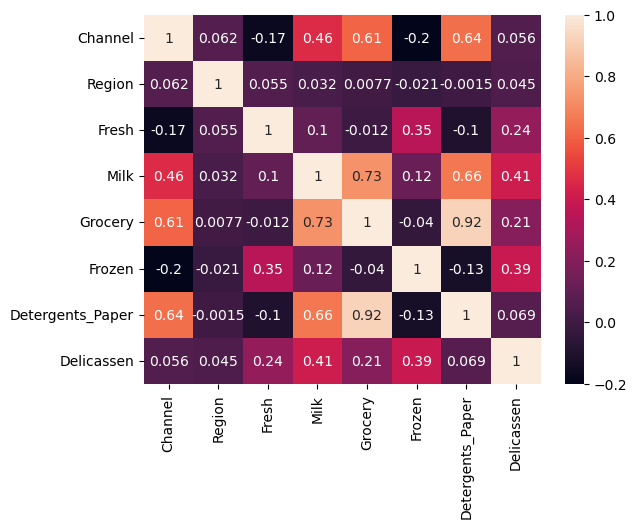

In [5]:
# Check for correlation mapping
sns.heatmap(df.corr(), annot=True)
plt.show()

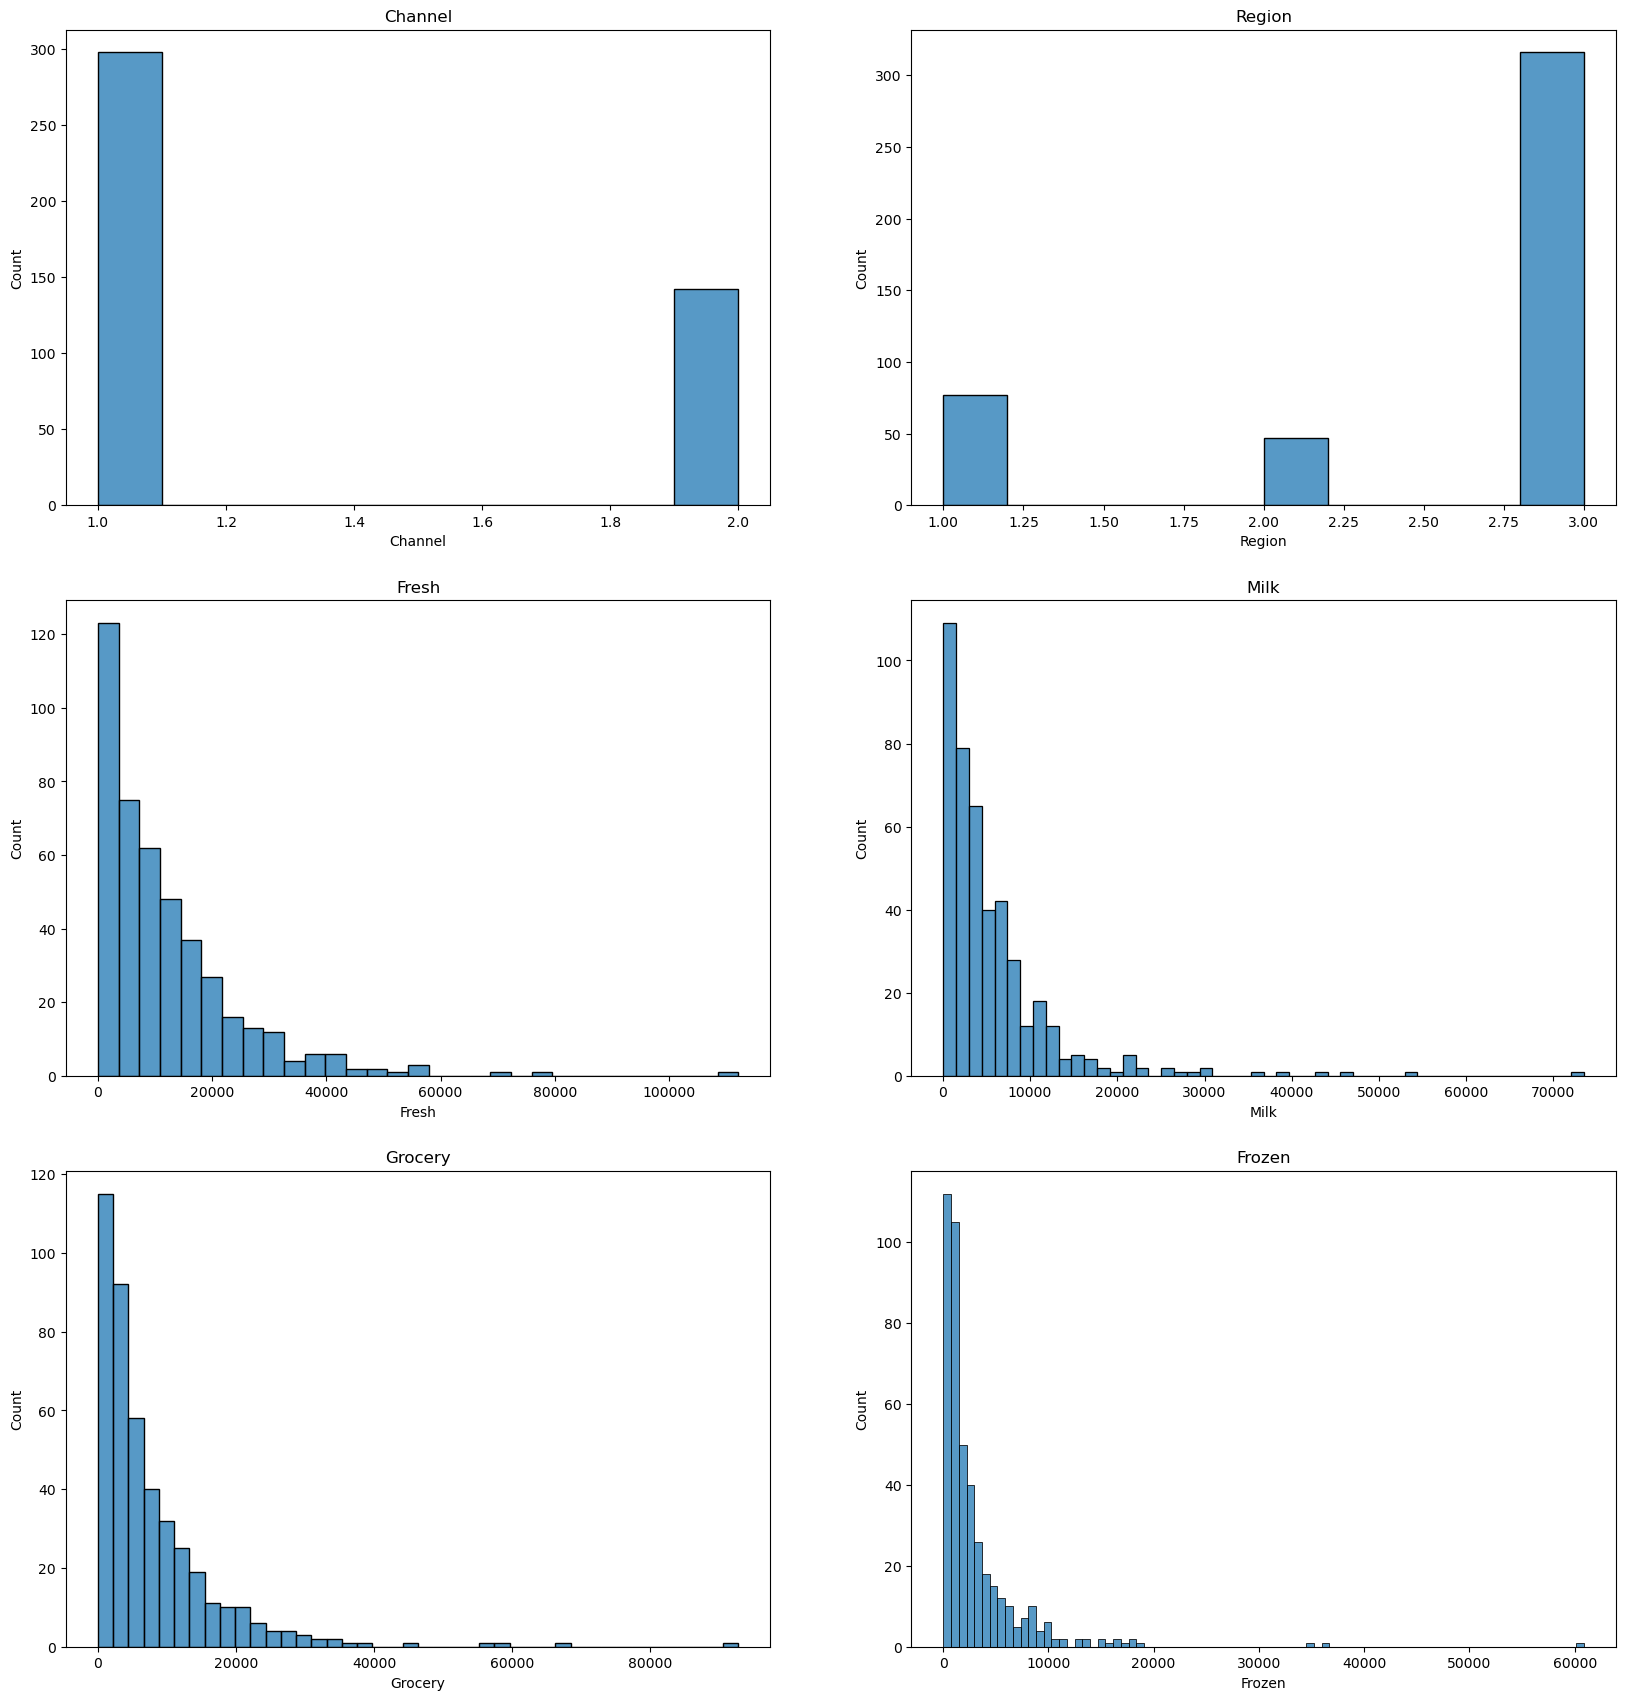

In [6]:
# determine skewness
def grouphist(columns):
    fig, axs = plt.subplots(nrows=math.ceil(len(columns) / 3), ncols=3 if len(columns) % 3 == 0 else 2, figsize=(20, math.ceil(len(columns) / 3) * 7))
    for idx, ax in enumerate(axs.flatten()):
        sns.histplot(df[columns[idx]], ax=ax)
        ax.set_title(columns[idx])
    plt.show()
grouphist(df.columns)

In [7]:
# drop duplicates
df.duplicated().sum()

0

EDA Insights:
- Most of the features are skewed to the right (positive skewness).
- There are many outliers in the data.
- There are no duplicate rows in the data.
- There is a strong correlation between Grocery and Detergents_Paper.
- There is a weak correlation between Frozen and Delicatessen.

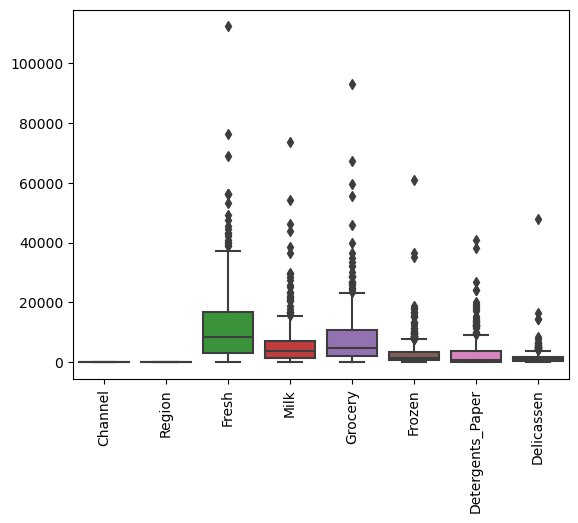

In [8]:
# check for data density
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

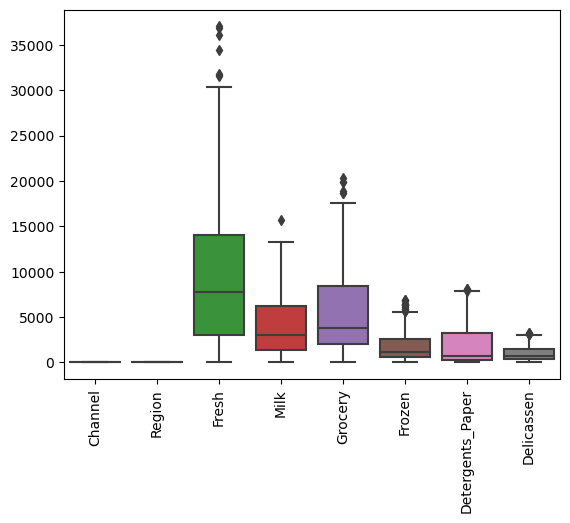

In [9]:
# removing outliers

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

for col in df.columns:
    df = remove_outliers(df, col)
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

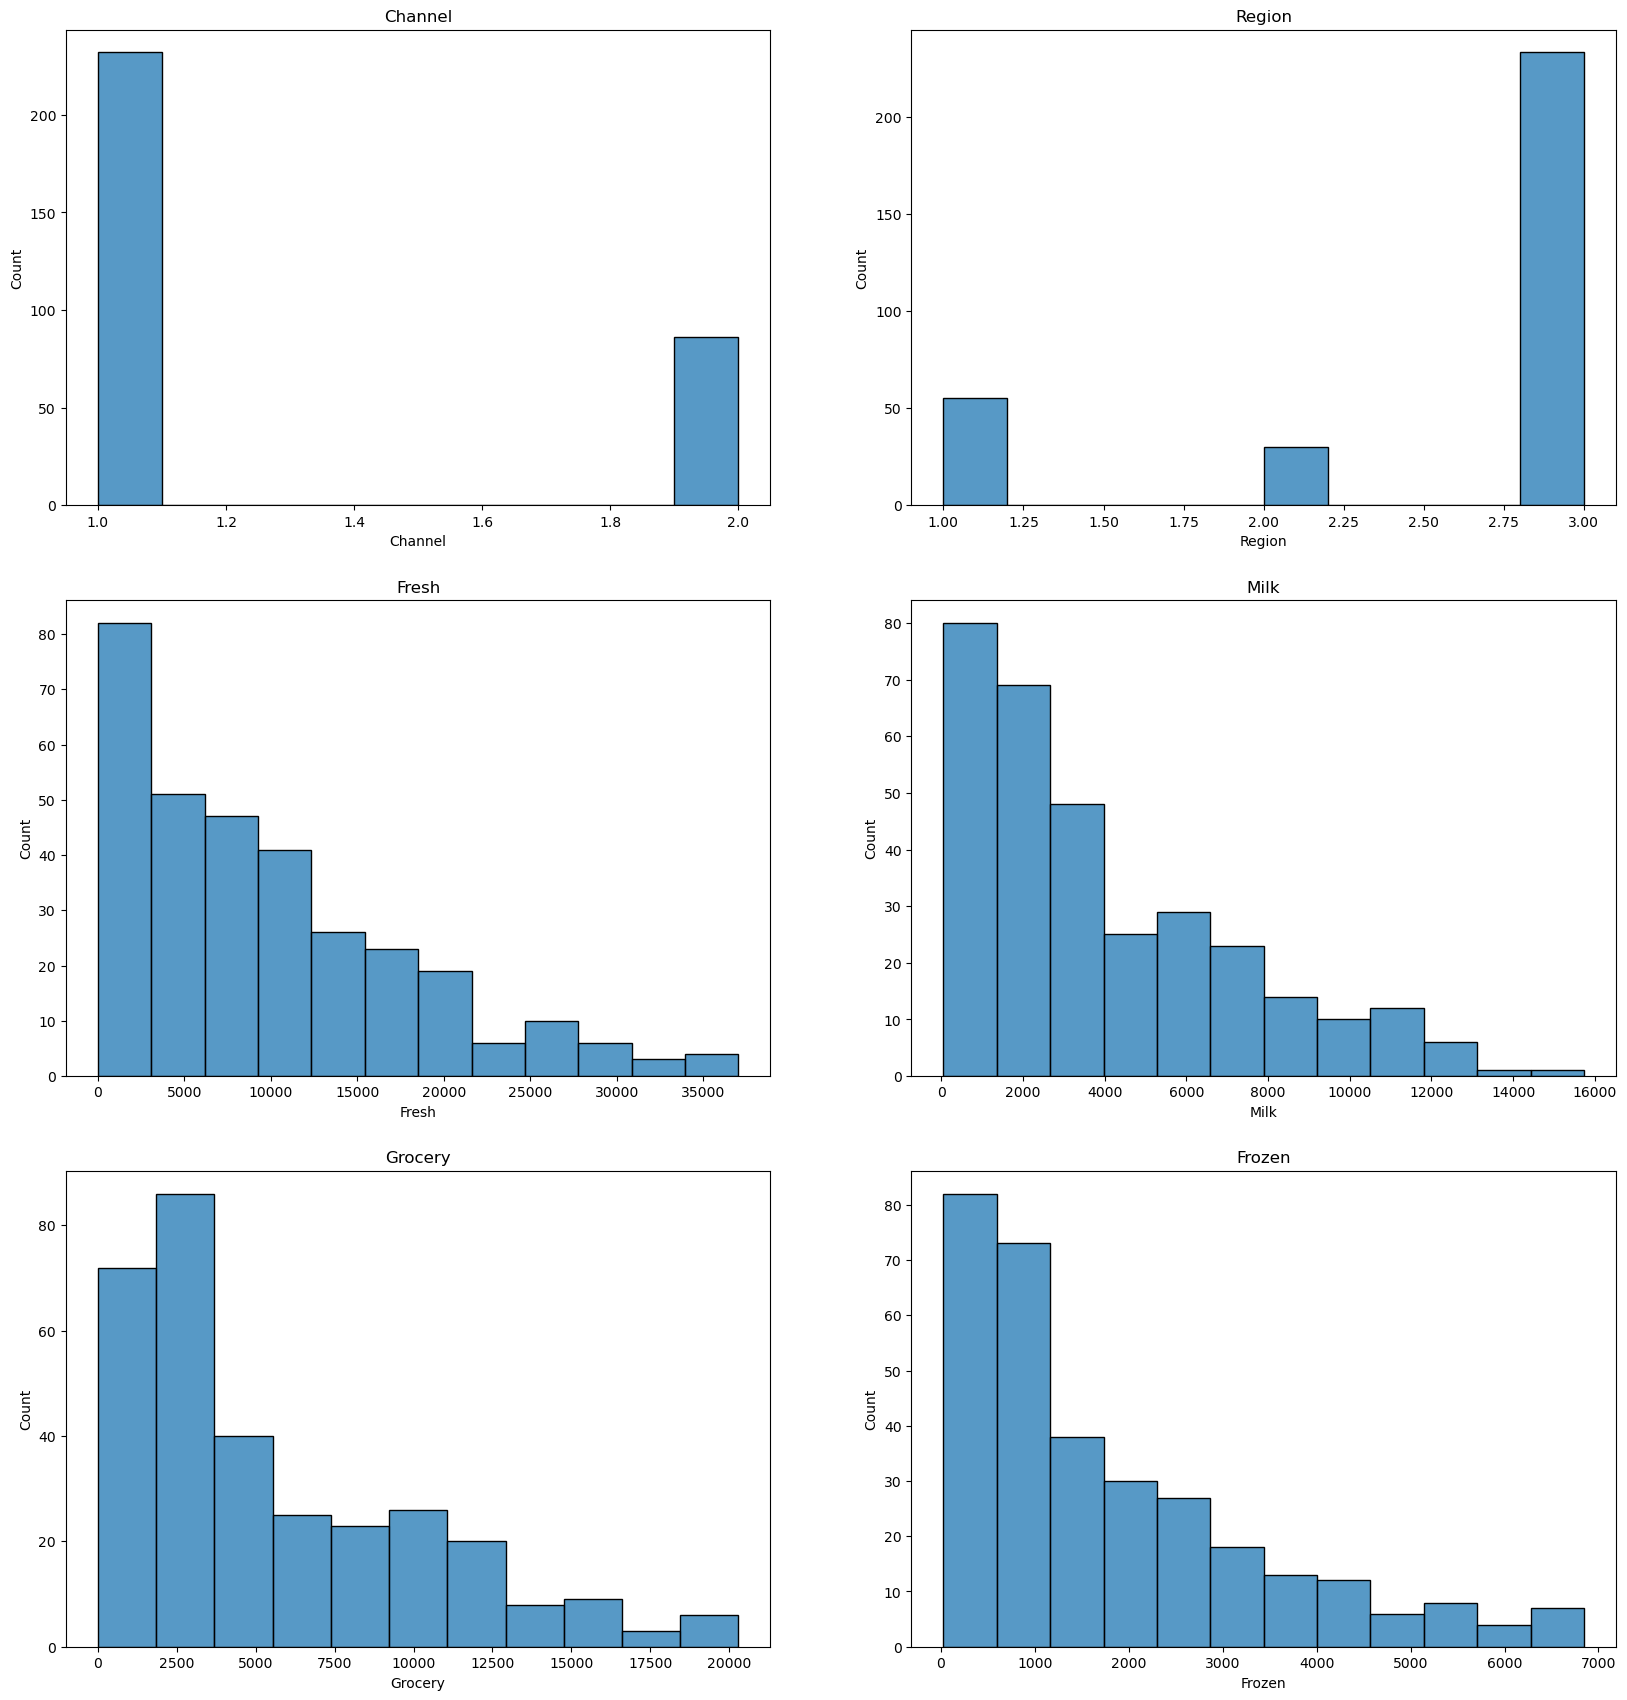

In [10]:
# removing values that are zero

columns = df.columns
for col in columns:
    df = df[df[col] != 0]
grouphist(columns)

In [11]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


In [12]:
# drop duplicates
df.duplicated().sum()

0

# Part II - KMeans Clustering

Data Preprocessing: normalizing + scaling

In [13]:
from sklearn import preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)

Correcting the skewness on any column would render the data in the negative, which would not make sense for the data. Therefore, we will not correct the skewness.

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

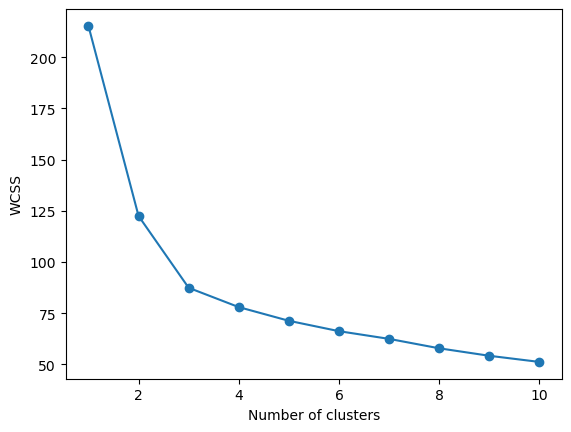

In [14]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
plot_distortion(df, 10)

We can conclude that the ideal number of clusters is 3 as the elbow point, the highest gain of mean squared errors, is at 3.

We can further test this by using the silhouette score. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [53]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X, y = make_blobs(n_samples=300, n_features=df.shape[0], random_state=0)

n_clusters_array = [2, 3, 4, 5]

for n_clusters in n_clusters_array:

    km = KMeans(n_clusters=n_clusters,
                init='k-means++',
                n_init=10,
                random_state=0)
    # y_km = km.fit_predict(df)
    cluster_labels = km.fit(df).labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5070925130347474
For n_clusters = 3 The average silhouette_score is : 0.5452596371064872


c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5945037086172781
For n_clusters = 5 The average silhouette_score is : 0.5265208964601147


c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Thus, we can conclude that the ideal number of clusters is 4 because the silhouette score is the highest at 4 clusters.

In [50]:
# X, y = make_blobs(n_samples=300, n_features=df.shape[0], random_state=0)
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                n_init=10,
                random_state=0)
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Add cluster labels to your original dataframe
df['Cluster'] = cluster_labels
df.head()

c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


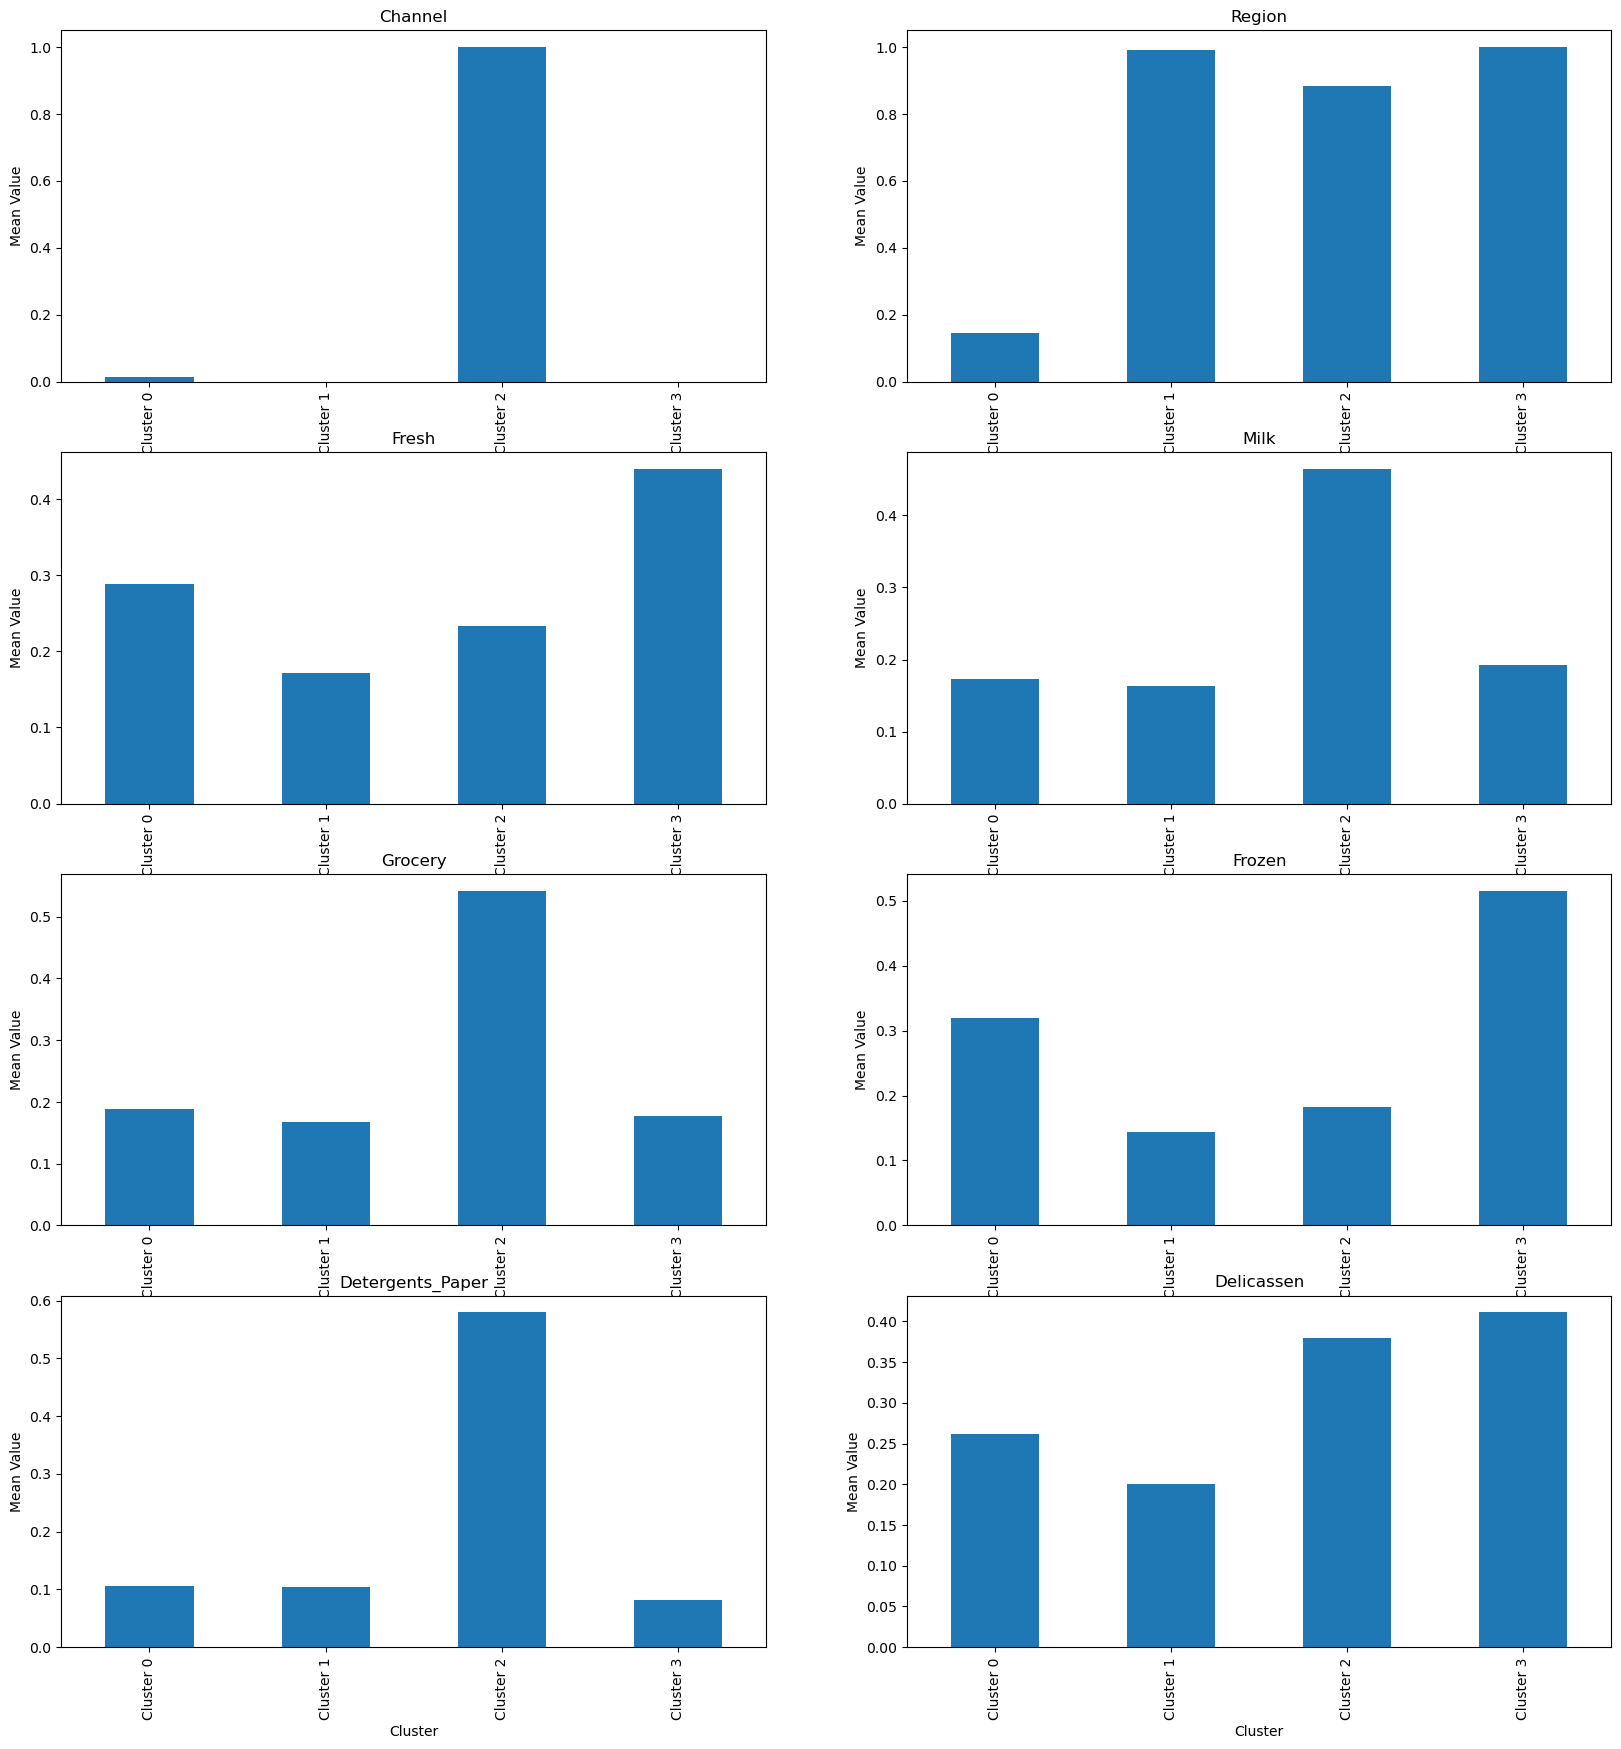

In [60]:
cluster_means = df.groupby('Cluster').mean()

cluster_means = cluster_means.transpose()

fig, axs = plt.subplots(nrows=math.ceil(len(columns) / 2), ncols=3 if len(columns) % 3 == 0 else 2, figsize=(20, math.ceil(len(columns) / 3) * 7))
for idx, ax in enumerate(axs.flatten()):
    feature = cluster_means.index[idx]
    cluster_means.loc[feature].plot(kind='bar', ax=ax)
    ax.set_ylabel('Mean Value')
    ax.set_xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    ax.set_title(feature)
plt.show()

In this series of charts, we can see how the different clusters grouped the data points. 
- Cluster 0: This cluster has very low region, meaning they are primarily grouped by region
- Cluster 1: This cluster has very low averages for all features, meaning they are primarily grouped by low spending
- Cluster 2: This cluster has very high channel, and also milk, grocery, detergents_paper, and delicatessen, meaning they are primarily grouped by channel and high spending in general
- Cluster 3: This cluster has very high fresh, frozen and delicatessen, meaning they are primarily grouped by high spending in these categories

We can see that each of these clusters share some similarities, but ultimately are grouped by different feature means, meaning that they are not very similar to each other in those categories.

We can test the result of the model using the silouhette score again.

In [51]:
silhouette_avg = silhouette_score(df, cluster_labels)
print(
    "The average silhouette_score is :",
    silhouette_avg,
)

The average silhouette_score is : 0.5945037086172781


Since the silouette score is nearing 0.6 and is positive, we can conclude that the model is somewhat good.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

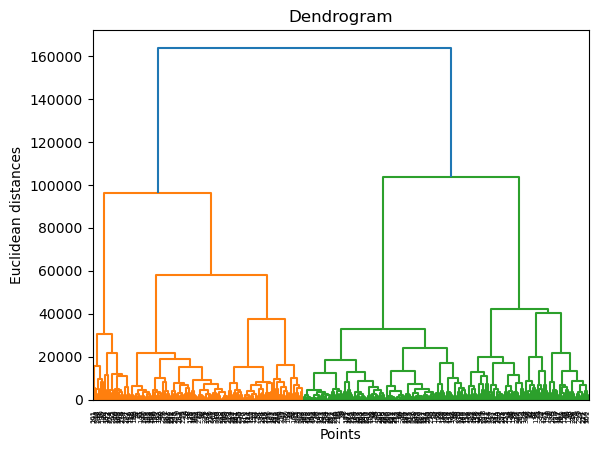

In [43]:
import scipy.cluster.hierarchy as sch
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
plot_dendrogram(df)

In this case, we can set the maximum distance between the clusters to 80000, which means that the clusters won't be too far away from each other while maintaining individuality. This would mean that the ideal number of clusters would be 4.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

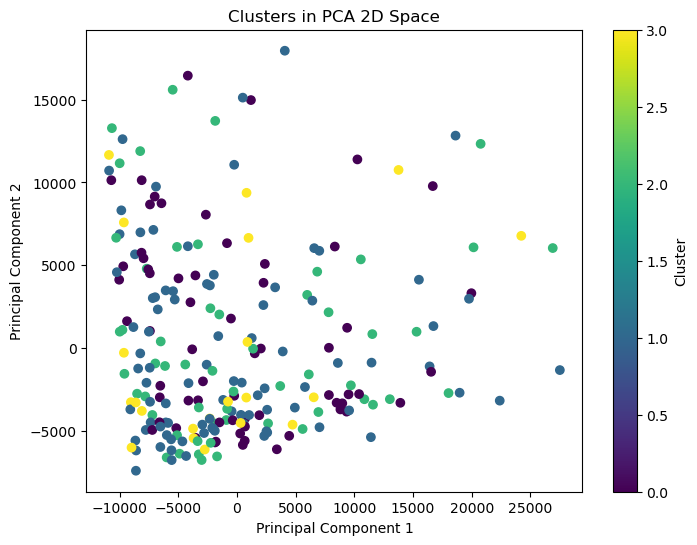

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = df['Cluster']

# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

The conclusion that I could draw from this project is that
1. Through the EDA process, there were alot of data that were outliers or not applicable to the model. This was due to the fact that the data was not normalized and the data was not scaled.
2. Through the KMeans Clustering process, we were able to find the optimal number of clusters to be 4. This was done through the elbow method.
3. Through the Hierarchical Clustering process, we were able to find the optimal number of clusters to be 4. This was done through the dendrogram method.
4. Through the PCA process, we can observe that the clusters are actually quite close to each other, to the point that the different features are almost indistinguishable from each other.

Furthermore, from this data processing and analysis, we can conclude that the columns that are important for the model are:
- Fresh
- Milk
- Grocery
- Detergents_Paper

because these are the columns that have the highest variance, so it would be recommended to distinguish the clusters based on these columns.

And that the ideal number of clusters would be 3 or 4, as the clusters are quite close to each other. In this case, the number of clusters would correspond to the number of different types of customers that the grocery store has, so the grocery store can use this information to better serve their customers.